In [1]:
import os
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import shutil

In [2]:
base_url = 'C:\\Users\\M\\Downloads\\fruit'

In [18]:
train_dir = os.path.join(base_url, 'train')
test_dir = os.path.join(base_url, 'test')

In [19]:
os.mkdir(train_dir)
os.mkdir(test_dir)

In [20]:
train_str_dir = os.path.join(train_dir, 'strawberry')
train_apple_dir = os.path.join(train_dir, 'apple')
train_orange_dir = os.path.join(train_dir, 'orange')
train_peach_dir = os.path.join(train_dir, 'peach')
test_str_dir = os.path.join(test_dir, 'strawberry')
test_apple_dir = os.path.join(test_dir, 'apple')
test_orange_dir = os.path.join(test_dir, 'orange')
test_peach_dir = os.path.join(test_dir, 'peach')

In [21]:
os.mkdir(train_str_dir)
os.mkdir(train_apple_dir)
os.mkdir(train_orange_dir)
os.mkdir(train_peach_dir)
os.mkdir(test_str_dir)
os.mkdir(test_apple_dir)
os.mkdir(test_orange_dir)
os.mkdir(test_peach_dir)

In [22]:
strawberry_files = os.listdir(base_url + '\\strawberry')[:400]
apple_files = os.listdir(base_url + '\\apple')[:400]
orange_files = os.listdir(base_url + '\\orange')[:400]
peach_files = os.listdir(base_url + '\\peach')[:400]

In [3]:
print(len(strawberry_files), len(apple_files),len(orange_files),len(peach_files))

NameError: name 'strawberry_files' is not defined

In [24]:
for f in strawberry_files[:320]:
    shutil.copy(base_url + '\\strawberry\\' + f, train_str_dir)
for f in strawberry_files[320:]:
    shutil.copy(base_url + '\\strawberry\\' + f, test_str_dir)

for f in orange_files[:320]:
    shutil.copy(base_url + '\\orange\\' + f, train_orange_dir)
for f in orange_files[320:]:
    shutil.copy(base_url + '\\orange\\' + f, test_orange_dir)

for f in peach_files[:320]:
    shutil.copy(base_url + '\\peach\\' + f, train_peach_dir)
for f in peach_files[320:]:
    shutil.copy(base_url + '\\peach\\' + f, test_peach_dir)

for f in apple_files[:320]:
    shutil.copy(base_url + '\\apple\\' + f, train_apple_dir)
for f in apple_files[320:]:
    shutil.copy(base_url + '\\apple\\' + f, test_apple_dir)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

import numpy as ny
import matplotlib.pyplot as plt
import os

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_data_importer = train_datagen.flow_from_directory(
    'C:\\Users\\M\\Downloads\\fruit\\train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

val_data_importer = train_datagen.flow_from_directory(
    'C:\\Users\\M\\Downloads\\fruit\\test',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

Found 1279 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3),
                    activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,684 (1.68 MB)

 Trainable params: 440,684 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(
    train_data_importer,
    epochs=50,
    validation_data=val_data_importer
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.2503 - loss: 1.3801 - val_accuracy: 0.2500 - val_loss: 1.3234
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4060 - loss: 1.2273 - val_accuracy: 0.5688 - val_loss: 1.0832
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6036 - loss: 1.0500 - val_accuracy: 0.5781 - val_loss: 1.0705
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.5981 - loss: 1.0454 - val_accuracy: 0.6656 - val_loss: 1.0013
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6689 - loss: 0.9518 - val_accuracy: 0.6125 - val_loss: 1.0327
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.6344 - loss: 0.9647 - val_accuracy: 0.6187 - val_loss: 0.9767
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6567 - loss: 0.9152 - val_accuracy: 0.6750 - val_loss: 0.9149
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6894 - loss: 0.8617 - val_accuracy: 0.

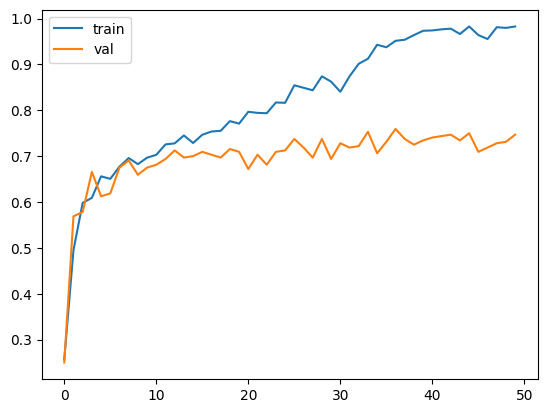

In [18]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train', 'val'])

In [20]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D

In [21]:
inputs = Input(shape=(100,100,3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(256, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs = inputs, outputs = x)
model.summary()


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,479,508 (5.64 MB)

 Trainable params: 1,479,508 (5.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
hist=model.fit(train_data_importer,
          validation_data=val_data_importer,
          epochs=50)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.2727 - loss: 1.3571 - val_accuracy: 0.4469 - val_loss: 1.0039
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.4899 - loss: 0.9669 - val_accuracy: 0.6187 - val_loss: 0.8484
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.6426 - loss: 0.8118 - val_accuracy: 0.6562 - val_loss: 0.7420
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.7068 - loss: 0.7043 - val_accuracy: 0.6750 - val_loss: 0.7116
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.6982 - loss: 0.6989 - val_accuracy: 0.6656 - val_loss: 0.7582
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7570 - loss: 0.5693 - val_accuracy: 0.6625 - val_loss: 0.7787
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.7416 - loss: 0.5877 - val_accuracy: 0.7312 - val_loss: 0.5935
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.7907 - loss: 0.4970 - val_accuracy: 0

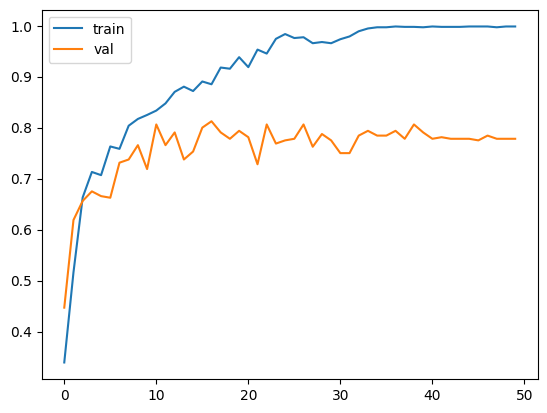

In [24]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train', 'val'])

In [14]:
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, add, \
                          Activation, Flatten, Dense, GlobalAveragePooling2D, Reshape, multiply, concatenate, Dropout, multiply


In [15]:
def Residual_Block(x, filters):
  x_skip = x
  f = filters

  x = Conv2D(f, (3,3), padding='same')(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)

  x = Conv2D(f, (3,3), padding='same')(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)

  x_skip = Conv2D(f, (1,1), strides=(1,1,))(x_skip)
  x_skip = BatchNormalization(axis=3)(x_skip)

  x = add([x, x_skip])
  x = Activation('relu')(x)

  return x


In [16]:
def Residual_Block_50(x, filters):
  x_skip = x
  f1, f2 = filters

  x = Conv2D(f1, (1,1), padding='same')(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)

  x = Conv2D(f1, (3,3), padding='same')(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)

  x = Conv2D(f2, (1,1), padding='same')(x)
  x = BatchNormalization(axis=3)(x)
  x = Activation('relu')(x)

  x_skip = Conv2D(f2, (1,1), strides=(1,1,))(x_skip)
  x_skip = BatchNormalization(axis=3)(x_skip)

  x = add([x, x_skip])
  x = Activation('relu')(x)

  return x



In [17]:
input = Input(shape = (100, 100,3))

x = Conv2D(64, (7,7), strides=(2,2), padding='same')(input)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

for i in range(3):
  x = Residual_Block_50(x, [64, 256])

for i in range(4):
  x = Residual_Block_50(x, [128, 512])

for i in range(6):
  x = Residual_Block_50(x, [256, 1024])
   
for i in range(3):
  x = Residual_Block_50(x, [512, 2048])

x = Residual_Block(x, filters=64)
x = Residual_Block(x, filters=64)

x = Residual_Block(x, filters=128)
x = Residual_Block(x, filters=128)

x = Residual_Block(x, filters=256)
x = Residual_Block(x, filters=256)

x = Residual_Block(x, filters=512)
x = Residual_Block(x, filters=512)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation='softmax')(x)

model = Model(inputs = input, outputs = x)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 50, 50, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 25, 25,    │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 13,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 13,    │      4,160 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 13,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 13,    │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 13, 13,    │     16,640 │ activation_1[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │      1,024 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 13, 13,    │     16,640 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │      1,024 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 13,    │          0 │ activation_2[0][… │
│                     │ 256)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 13,    │          0 │ add[0][0]         │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 13, 13,    │     16,448 │ activation_3[0][

 Total params: 51,003,140 (194.56 MB)

 Trainable params: 50,916,100 (194.23 MB)

 Non-trainable params: 87,040 (340.00 KB)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
hist=model.fit(train_data_importer,
          validation_data=val_data_importer,
          epochs=10)

Epoch 1/10


c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/40 ━━━━━━━━━━━━━━━━━━━━ 6:07 10s/step - accuracy: 0.1953 - loss: 1.7537 

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 513s 11s/step - accuracy: 0.3585 - loss: 1.4825 - val_accuracy: 0.2500 - val_loss: 1930.4385
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 467s 12s/step - accuracy: 0.5570 - loss: 1.0089 - val_accuracy: 0.2500 - val_loss: 117.7007
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 423s 11s/step - accuracy: 0.5882 - loss: 0.9007 - val_accuracy: 0.2500 - val_loss: 1.6299
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 460s 11s/step - accuracy: 0.5979 - loss: 0.9038 - val_accuracy: 0.2344 - val_loss: 1.6904
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 443s 11s/step - accuracy: 0.5798 - loss: 0.9048 - val_accuracy: 0.3688 - val_loss: 2.0299
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 404s 10s/step - accuracy: 0.6415 - loss: 0.8170 - val_accuracy: 0.3094 - val_loss: 2.3516
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 403s 10s/step - accuracy: 0.6717 - loss: 0.7754 - val_accuracy: 0.3656 - val_loss: 1.6596
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 404s 10s/step - accuracy: 0.7053 - loss: 0.7183 - val_accuracy: 0.4781 -

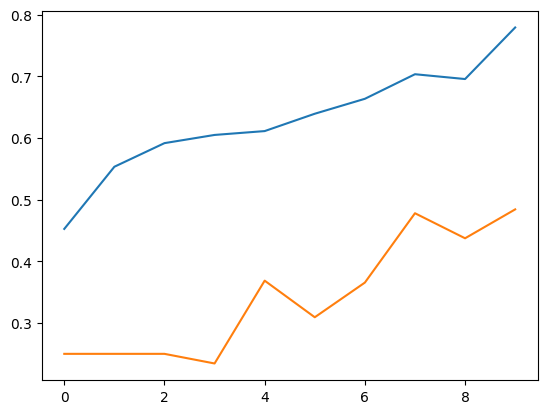

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [28]:
np.tanh((0.6*0.5) +(0.2*5))

0.8617231593133063

In [29]:
np.tanh(0.86*0.5+0.2*7)

0.9498260756930405